# Fourier Transform

In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from scipy.fft import fft, rfft, fftfreq, rfftfreq, irfft

pd.options.display.float_format = "{:,.2f}".format

## Signal

In [90]:
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

## Data

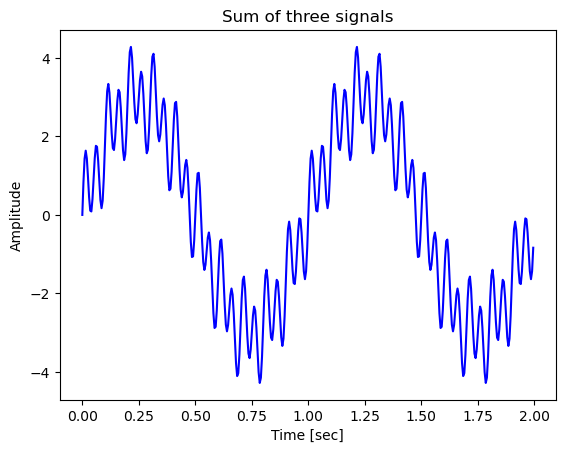

In [91]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

## FFT

### Raw

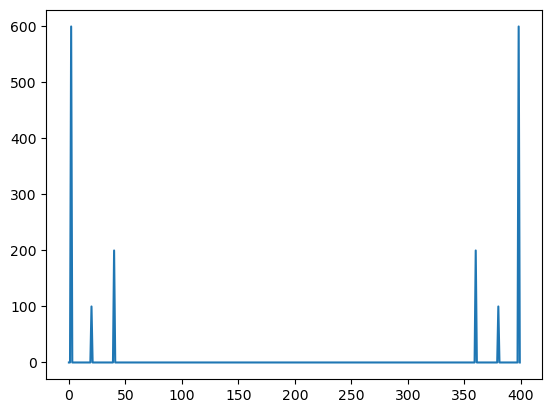

In [92]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()

### Normalize

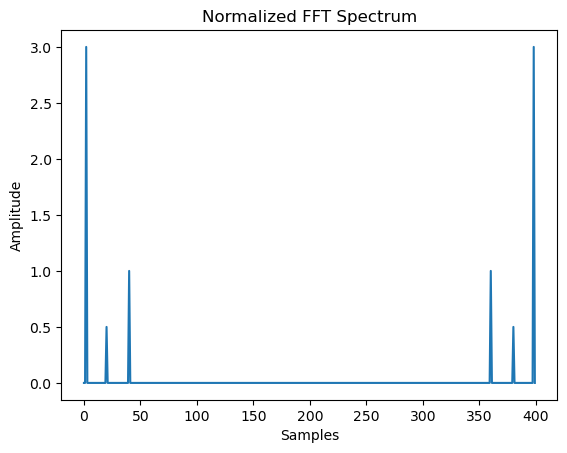

In [93]:
# Calculate N/2 to normalize the FFT output
N = len(signal)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()

### Frequency Components

In [94]:
len(signal)

400

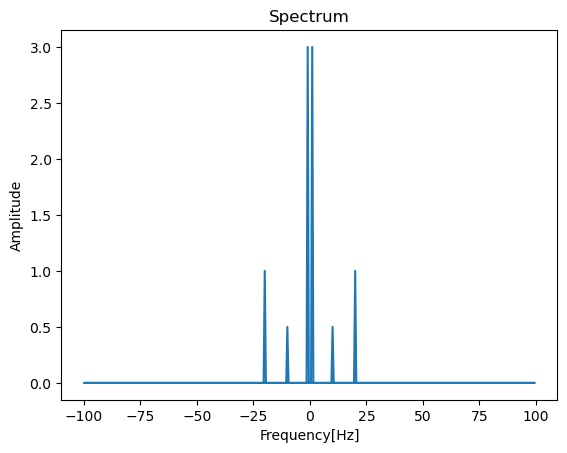

In [95]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d= 1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

### Data is Real Valued

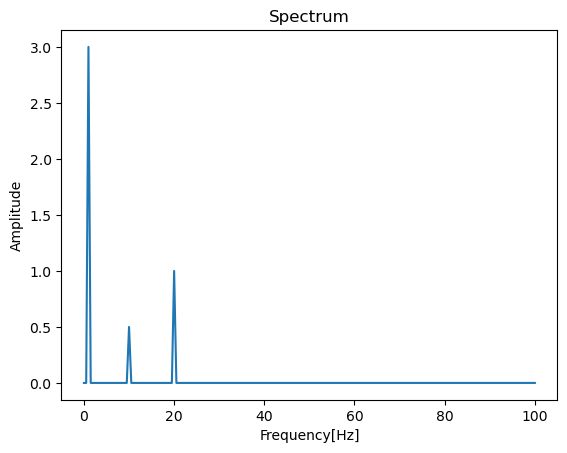

In [96]:
# Plot the actual spectrum of the signal
frequency = rfftfreq(N, d=1/sampling_rate) 
amplitude = 2*np.abs(rfft(signal))/N

plt.plot(frequency, amplitude)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

### Smoothing

Remove the high orders of the signal

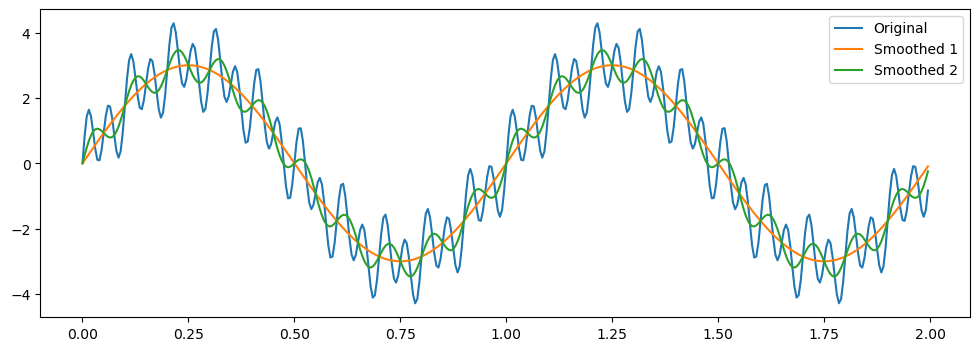

In [97]:
# Remove High order components 
signal_fourier_smooth_1 = rfft(signal) 
signal_fourier_smooth_1[10:] = 0

signal_fourier_smooth_2 = rfft(signal) 
signal_fourier_smooth_2[25:] = 0

signal_smooth_1 = np.fft.irfft(signal_fourier_smooth_1) # Inverse Fourier 
signal_smooth_2 = np.fft.irfft(signal_fourier_smooth_2) # Inverse Fourier 

plt.figure(figsize=(12,4))
plt.plot(signal_1hz.time_axis, signal, label='Original')
plt.plot(signal_1hz.time_axis, signal_smooth_1, label='Smoothed 1')
plt.plot(signal_1hz.time_axis, signal_smooth_2, label='Smoothed 2')
plt.legend()
plt.show()

### Final Plot

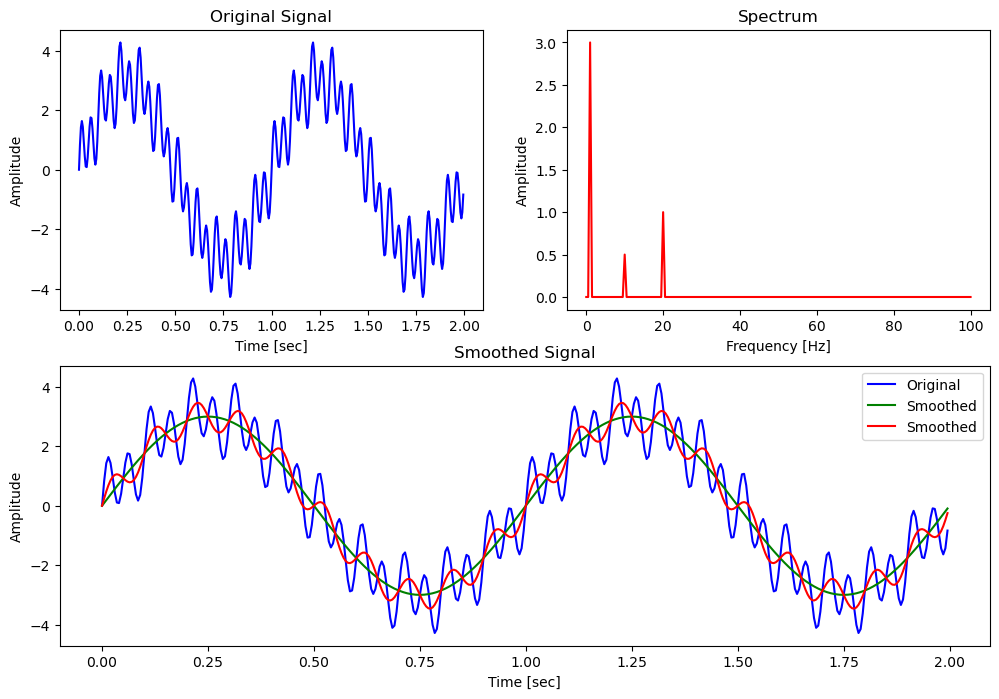

In [117]:
plt.figure(figsize=(12, 8))

# Original Signal
ax1 = plt.subplot(2,2,1)

# Plot the signal
ax1.plot(signal_1hz.time_axis, signal, 'b')
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Original Signal')

ax2 = plt.subplot(2,2,2)
ax2.plot(frequency, amplitude, color = "red")
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')
ax2.set_title("Spectrum")

ax3= plt.subplot(2,1,2)
ax3.plot(signal_1hz.time_axis, signal, color = "blue", label='Original')
ax3.plot(signal_1hz.time_axis, signal_smooth_1, color = "green", label='Smoothed')
ax3.plot(signal_1hz.time_axis, signal_smooth_2, color = "red", label='Smoothed')
ax3.set_xlabel("Time [sec]")
ax3.set_ylabel("Amplitude")
ax3.set_title("Smoothed Signal")

ax3.legend()


axes = [ax1, ax2, ax3]

plt.savefig(f'img/fourier_transform_smoothing.png', dpi=300, bbox_inches="tight")
plt.show()

## Real Example 

In [85]:
def read_dataset():

    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
    df = pd.read_csv(url)
    df["date"] = pd.to_datetime(df["Month"], format = "%Y-%m")
    df.drop(columns=["Month"], inplace = True)
    df.sort_values(by = ["date"], ascending=True, inplace = True)
    df.reset_index(drop = True, inplace = True)
    df["Passengers"] = df["Passengers"].astype(float)

    return df 

ts_variable = "Passengers"
date_variable = "date"

df = read_dataset()
df

,Passengers,date
0,112.00,1949-01-01
1,118.00,1949-02-01
2,132.00,1949-03-01
3,129.00,1949-04-01
4,121.00,1949-05-01
...,...,...
139,606.00,1960-08-01
140,508.00,1960-09-01
141,461.00,1960-10-01
142,390.00,1960-11-01


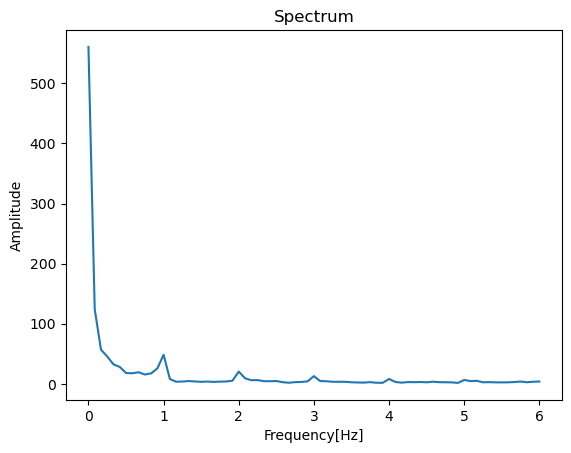

In [86]:
# Plot the actual spectrum of the signal
N = len(df)
sampling_rate = 12 

frequency = rfftfreq(N, d=1/sampling_rate) 
amplitude = 2*np.abs(rfft(df[ts_variable].values))/N

plt.plot(frequency, amplitude)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

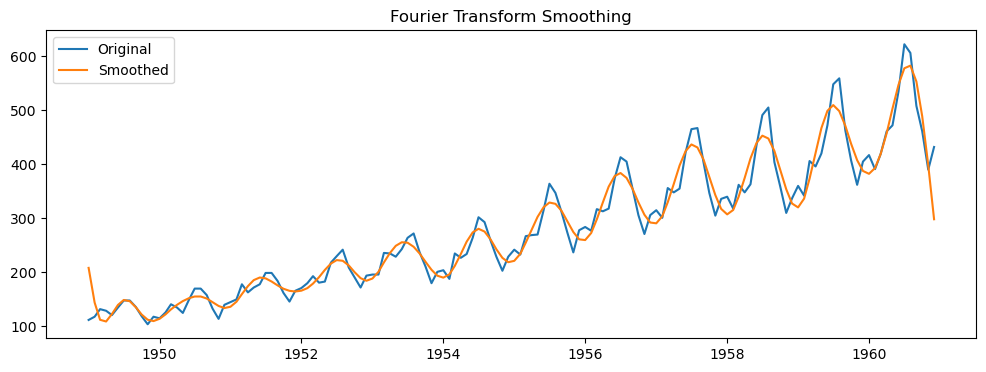

In [87]:
# Remove High order components 
df_f_smooth= rfft(df[ts_variable].values) 
df_f_smooth[20:] = 0
df_smooth = np.fft.irfft(df_f_smooth) # Inverse Fourier 

plt.figure(figsize=(12,4))
plt.plot(df[date_variable], df[ts_variable], label = f'Original')
plt.plot(df[date_variable], df_smooth, label = f'Smoothed')
plt.title("Fourier Transform Smoothing")
plt.legend()